In [1]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
inst_data = pd.read_csv('data_cleaned_non_norm.csv')
inst_data = inst_data.drop("Unnamed: 0",axis=1)
chicago_state_u = inst_data[inst_data.institution_name == 'Chicago State University']
X_test = pd.read_csv('X_test.csv')
X_test = X_test.drop("Unnamed: 0",axis=1)
X_train = pd.read_csv('X_train.csv')
X_train = X_train.drop("Unnamed: 0",axis=1)
y_test = pd.read_csv('y_test.csv')
y_test = y_test.drop("Unnamed: 0",axis=1)
y_train = pd.read_csv('y_train.csv')
y_train = y_train.drop("Unnamed: 0",axis=1)

#### Below is a review of Chicago State University's features.

In [3]:
chicago_state_u

,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
218,144005,Chicago State University,Chicago,IL,Bachelor's Degree,57914,12671821,0.2118,16.0,0.0394,254.0


#### Where Chicago State University lives in the feature distributions:

In [4]:
def plot_compare(feat_name, description, state=None, figsize=(10, 5)):
    plt.subplots(figsize=figsize)
    if state is None:
        inst_x = inst_data[feat_name]
    else:
        inst_x = inst_data.loc[inst_data.state_or_territory_abbreviation == state, feat_name]
    inst_x = inst_x[np.isfinite(inst_x)]
    plt.hist(inst_x, bins=30)
    plt.axvline(x=chicago_state_u[feat_name].values, c="r", ls="--", alpha=0.8, label="Chicago State University")
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for all institutions')
    plt.legend()

#### Chicago State University is grouped within the more selective institutions during the 2015/2016 academic year.

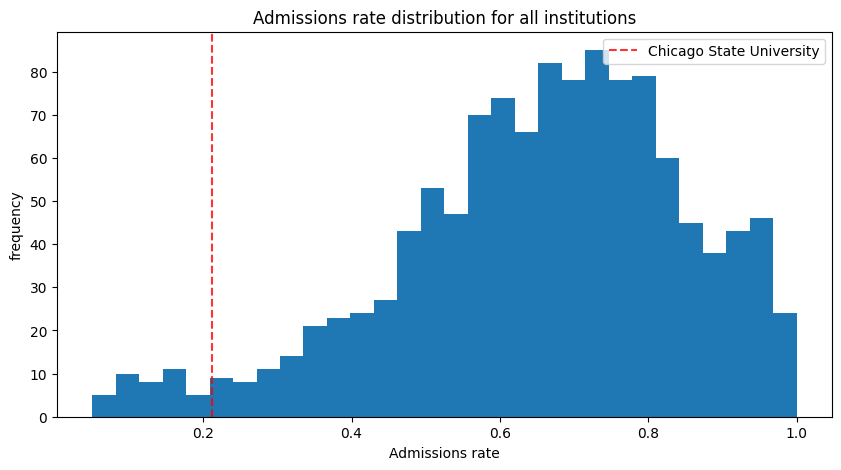

In [5]:
plot_compare('admission_rate', 'Admissions rate')

#### Chicago State University recorded a low ACT 25th percentile score relative to the other insitutions of the 2015 freshman class.

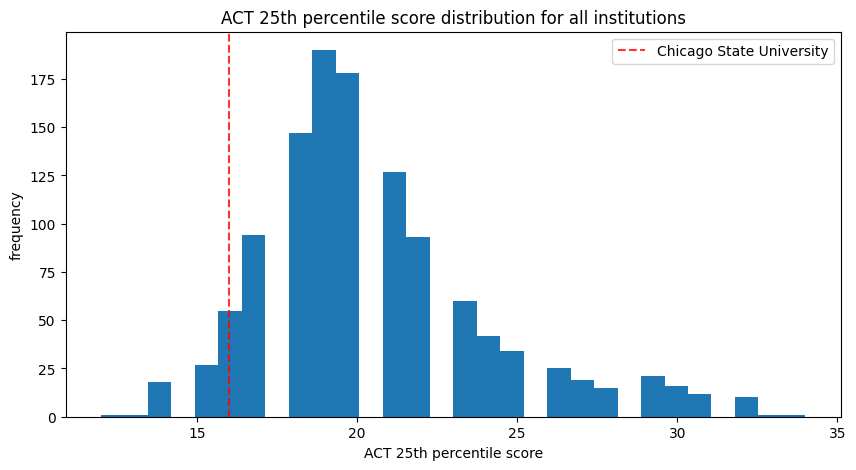

In [6]:
plot_compare('act_25th_percentile_score', 'ACT 25th percentile score')

#### Chicago State University had a very low graduation rate relative to the other institutions in the 2018/2019 academic year.

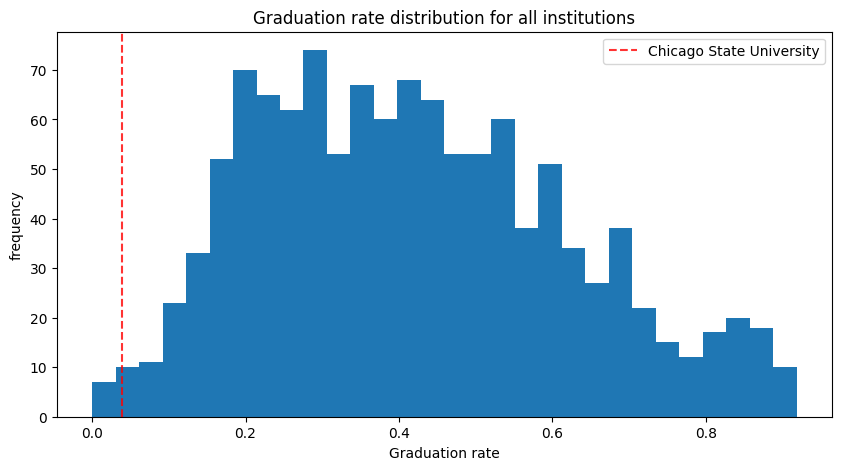

In [7]:
plot_compare('graduation_rate', 'Graduation rate')

#### The graduating student total mirors the low graduation rate in the 2018/2019 academic year.

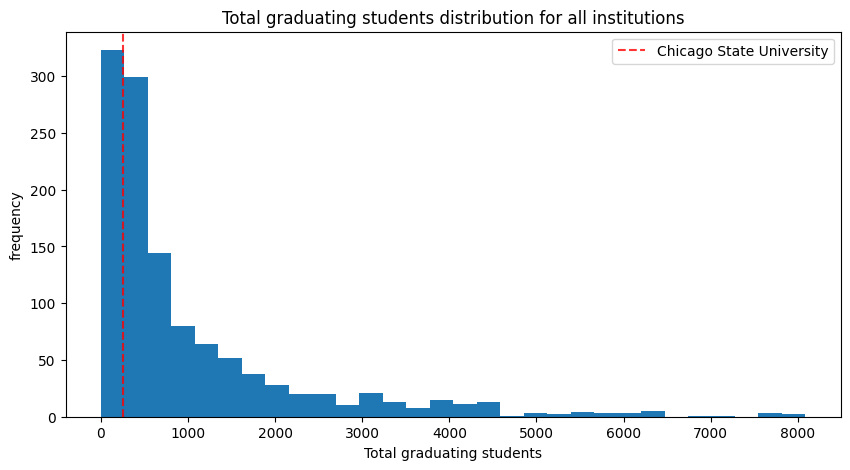

In [8]:
plot_compare('graduation_frequency', 'Total graduating students')

## Applying the machine learning models:

#### This is a regression problem, in supervised learning.  Some regression models to consider are:
#### Simple linear
#### Multiple linear
#### Support Vector
#### Decision Tree
#### Random Forest

#### In previous notebook I noticed that admission_rate and graduation_rate had a strong correlation on the heatmap.  I will perform a linear regression with these features.  Admission_rate being the independent variable and graduation_rate being the dependent variable.

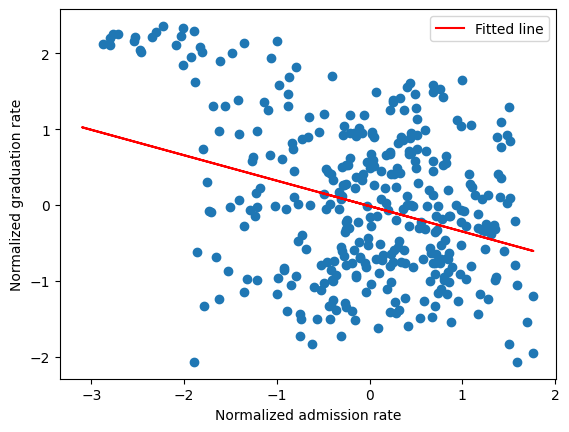

Coefficient of determination: 0.12


<Figure size 640x480 with 0 Axes>

In [9]:
#Simple linear regression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
X = np.array(X_train['admission_rate'])
y = np.array(y_train['graduation_rate'])
mask = ~np.isnan(X) & ~np.isnan(y)
s,i,r,p,st = stats.linregress(X[mask], y[mask])
X_tst = np.array(X_test['admission_rate']) 
y_tst = np.array(y_test['graduation_rate'])
plt.scatter(X_tst,y_tst)
plt.plot(X, s*X+i, 'r', label='Fitted line')
plt.legend()
plt.xlabel('Normalized admission rate')
plt.ylabel('Normalized graduation rate')
plt.show()
r2_lr = r**2
print("Coefficient of determination: %.2f" % r2_lr)
plt.savefig("1.png")

In [10]:
# Multiple Linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
r2_mlr = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2_mlr)


Coefficients: 
 [[-1.37290576e-06  3.45721069e-03  6.47810190e-02  2.14325712e-02
   7.82604189e-01 -1.16483444e-01 -3.07255845e-01 -3.54362168e-01
   5.42144690e-01 -1.31109775e-02 -5.59833318e-01  3.23462301e-01
   5.94357058e-02  4.59636591e-01 -2.89014129e-01 -1.27247038e-01
  -6.29601498e-02  4.18596040e-01 -3.74786519e-01 -1.19686140e-01
   9.75443022e-02 -2.46270292e-01 -2.54482187e-01 -5.42867657e-01
   2.87814670e-01 -3.48063447e-02  3.25069391e-01 -3.49338458e-01
   2.94184379e-01 -1.27740131e-01 -3.66774698e-02 -4.34390952e-01
   2.99708025e-01 -2.55366809e-01 -1.03885078e-01  8.91194451e-01
   1.22953333e-01 -6.88025343e-01 -1.11022302e-16  2.41537723e-01
   1.82263730e-01 -2.96417705e-01  5.47715288e-02  4.88776960e-01
   3.23809631e-01  3.35876907e-01 -1.54630382e-01  7.21845104e-02
  -2.35221481e-01 -9.74389053e-01  4.62332001e-01  1.94289029e-16
   6.88724229e-01  2.59630979e-01  4.31837379e-02 -1.38297203e-01
  -8.46854154e-01]]
Mean squared error: 0.38
Coefficient of 

#### Let's interpret our results.  First I want to undo the normalization of the graduation_rate series.

In [11]:
def inv_normalize_gradrate(feature_normalized):
    mu = inst_data['graduation_rate'].mean()
    sd = inst_data['graduation_rate'].std()
    return sd*feature_normalized + mu
test_mse = mean_squared_error(inv_normalize_gradrate(y_test), inv_normalize_gradrate(y_pred))
print('Test rmse of graduation rate:', np.sqrt(test_mse))


Test rmse of graduation rate: 0.12452592153424473


In [12]:
# Support vector machine regression model

from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr = SVR()
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_svr))

# The coefficient of determination: 1 is perfect prediction
r2_svm = r2_score(y_test, y_pred_svr)
print("Coefficient of determination: %.2f" % r2_svm)

Mean squared error: 1.09
Coefficient of determination: -0.03


In [13]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

regr_d = DecisionTreeRegressor(max_depth=2)
regr_d.fit(X_train, y_train)
y_pred_dt = regr_d.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_dt))

# The coefficient of determination: 1 is perfect prediction
r2_dt = r2_score(y_test, y_pred_dt)
print("Coefficient of determination: %.2f" % r2_dt)

Mean squared error: 0.50
Coefficient of determination: 0.52


In [14]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2)
rf.fit(X_train, y_train)

#Predict using the model:

y_pred_rf = rf.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_rf))

# The coefficient of determination: 1 is perfect prediction
r2_rf = r2_score(y_test, y_pred_rf)
print("Coefficient of determination: %.2f" % r2_rf)


Mean squared error: 0.40
Coefficient of determination: 0.62


#### Let's compare the models based on coefficient of determination.

In [25]:
myLabels = ['Simple Linear Regression', 'Multiple Linear Regression','Support Vector Regression','Decision Tree','Random Forest']

cod = [r2_lr, r2_mlr,r2_svm,r2_dt,r2_rf]

score_tab_det = pd.DataFrame(list(zip(myLabels, cod)), 
               columns =['Algorithm', 'Coefficient of determination']) 
score_tab_det.index += 1
print(score_tab_det)


                    Algorithm  Coefficient of determination
1    Simple Linear Regression                      0.116623
2  Multiple Linear Regression                      0.640803
3   Support Vector Regression                     -0.034517
4               Decision Tree                      0.522647
5               Random Forest                      0.618127


#### Multiple linear regression and Random Forest are the top two models.  

#### I will perform a grid search / hyperparameter tuning for the Random Forest model.

In [16]:
# Observing parameters being used by random forest model:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 150, 200],
               'max_depth': [5,10,15,20],
               'min_samples_split' : [2,5,10]}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=10),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [18]:
best_params = CV_rf.best_params_
print('Best Hyperparameters:', best_params)
best_score = CV_rf.best_score_
print('Mean cross-validated score of the best_estimator:',best_score)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Mean cross-validated score of the best_estimator: 0.6651723284096722


In [19]:
rf_best = RandomForestRegressor(**best_params)
rf_best.fit(X_train, y_train)
y_pred1 = rf_best.predict(X_test)
rf_best_mse = mean_squared_error(y_test, y_pred1)
print("MSE:", rf_best_mse)
rf_best_r2 = r2_score(y_test, y_pred1)
print("Coefficient of determination:", rf_best_r2)

MSE: 0.40421335094601596
Coefficient of determination: 0.6178555693169255


#### The new random forest model has a worse mean squared error and coefficient of determination.

In [24]:
features = X_train
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X_train,imp)),columns =['Features', 'Importance scores']) 
tab.index += 1
print(tab)

                         Features  Importance scores
1                  Institution_ID           0.000000
2    territory_or_state_area_sqmi           0.000000
3   territory_or_state_population           0.000018
4                  admission_rate           0.000025
5       act_25th_percentile_score           0.000047
6            graduation_frequency           0.000059
7                              AL           0.000061
8                              AR           0.000065
9                              AZ           0.000069
10                             CA           0.000069
11                             CO           0.000110
12                             CT           0.000115
13                             DC           0.000125
14                             DE           0.000137
15                             FL           0.000209
16                             GA           0.000250
17                             HI           0.000311
18                             IA           0.

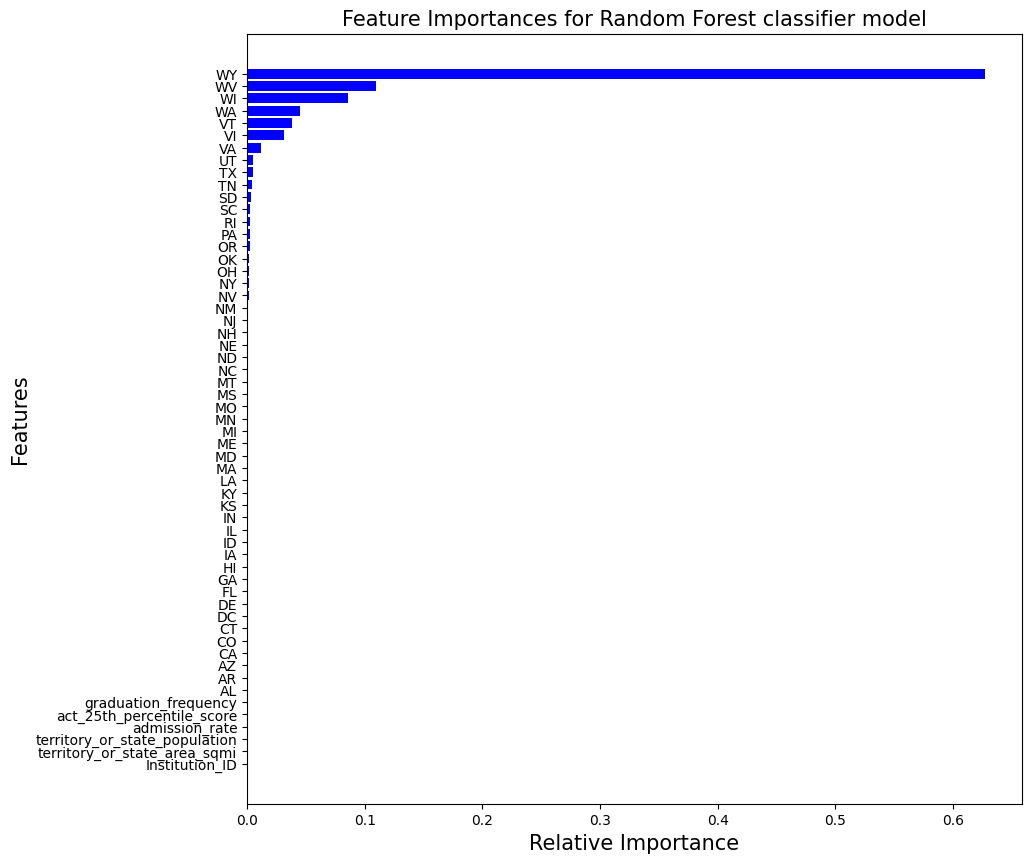

In [21]:
#Visual comparison:
plt.figure(figsize=(10,10))
#indices = np.argsort(importances)
index = list(range(0,57))
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
#plt.savefig("2.png")
plt.show()

### Conclusion

#### Overall, my multiple linear regression model performed the best at explaining the variance in the data.

#### The above conclusion about feature importances leads me to think that Wyoming has an unsually high graduation rate.